The given function is

$f(x,y) = (1.7-x)^2 + 60(y-x^2)^2$

From the given function it is clear that the minimiser is at

$x_m = 1.7, y_m = 2.89$

And the minimum of the function at these two values are

$f(1.7, 2.89) = 0$

The table for
tolerance         iterations          minima
[[ 0.00000000e+00  1.36600000e+03  8.55335996e-01]
 [ 1.00000000e+00  7.96800000e+03  2.61919994e-02]
 [ 2.00000000e+00  2.09770000e+04  3.08347513e-04]
 [ 3.00000000e+00  3.52920000e+04  3.13763781e-06]
 [ 4.00000000e+00  4.97530000e+04  3.14253890e-08]
 [ 5.00000000e+00  6.42280000e+04  3.14102966e-10]
 [ 6.00000000e+00  7.87050000e+04  3.19078097e-12]
 [ 7.00000000e+00  9.31810000e+04 -4.39648318e-14]
 [ 8.00000000e+00  1.07658000e+05  2.22044605e-15]
 [ 9.00000000e+00  1.22134000e+05  1.31006317e-13]]

1.3100631690576847e-13
Minimiser in x =  1.6999999982279308
Minimiser in y =  2.8899999939669696


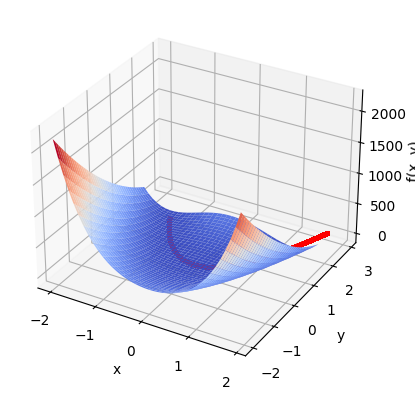

In [16]:
#Exercise 3 part 2 and 3

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    # Roll no. = 22b2467
    # a = 0.7 and b = 60
    return 60*x**4 - 120*y*(x**2) + x**2 +60*y**2 - 3.4*x + 2.89


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 240*x**3 - 240*x*y + 2*x - 3.4

def df_dy(x, y):
    return 120*y - 120*x**2

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate):

    # An array X and Y to store and display the tolerance vs iterations graph
    tablelist=[]

    for i in range (10):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - learning_rate * grad_x
            y = y - learning_rate * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        #To tabulate, tolerance, iterations, minima
        tablelist.append((i, count, f(x,y)))

        table_array = np.array(tablelist)

    # Printing the table
    print("The table for")
    print("tolerance         iterations          minima")
    print(table_array)

    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-2, 2, 0.1)
y_range = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = -1.5, 1.5
learning_rate = 0.001
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

Shortcomings of this algorithm may include:



*   May only be able to find local gradient
*   May take a long time to achieve convergence

